In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Step 1: Load the Titanic Dataset
titanic = sns.load_dataset('titanic')
# Step 2: Inspect the Dataset
print("First 5 rows of the Titanic dataset:")
print(titanic.head())

First 5 rows of the Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [15]:
# Check for missing values
print("\nMissing values in each column:")
print(titanic.isnull().sum())
# Note: The user reported a SyntaxError in cell pzhN402RmhQh.
# The error is 'incomplete input' due to a missing closing parenthesis in 'print(titanic_cleaned.head()'.
# To fix it, change the line to 'print(titanic_cleaned.head())' in cell pzhN402RmhQh.


Missing values in each column:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
family_size    0
dtype: int64


In [4]:
# Check data types
print("\nData types and basic statistics:")
print(titanic.info())


Data types and basic statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [5]:
# Check stastical summary
print("\n statistical Summary:")
print(titanic.describe())
# Check shape of dataset
print("\n Shape of dataset:")
print(titanic.shape)


 statistical Summary:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

 Shape of dataset:
(891, 15)


In [6]:
titanic.fillna({'age': titanic['age'].median()}, inplace=True)

In [7]:

titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])


In [8]:
# Drop any remaining rows with missing values
titanic.dropna(inplace=True)
print("\nMissing values after cleaning:")
print(titanic.isnull().sum())


Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [9]:
# Step 4: Handle Categorical Variables
# Convert 'sex' and 'embarked' into numerical labels using LabelEncoder
label_encoder = LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
# Convert 'who' into binary (man: 1, woman: 0)
titanic['who'] = titanic['who'].apply(lambda x: 1 if x == 'man' else 0)

In [10]:
# Step 5: Feature Engineering
# Create a new feature: 'family_size' = 'sibsp' + 'parch' + 1
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
# Step 6: Remove Duplicates
titanic_cleaned = titanic.drop_duplicates()

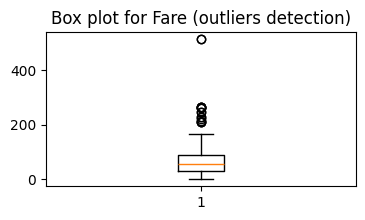

In [11]:
# Step 7: Handle Outliers
# Inspecting outliers in the 'fare' column
plt.figure(figsize=(4,2))
plt.boxplot(titanic_cleaned['fare'])
plt.title("Box plot for Fare (outliers detection)")
plt.show()

In [12]:
# Cap outliers in 'fare' to the 99th percentile
fare_cap = titanic_cleaned['fare'].quantile(0.99)
titanic_cleaned['fare'] = np.where(titanic_cleaned['fare'] > fare_cap, fare_cap, titanic_cleaned['fare'])

print("\nFare column statistics after handling outliers:")
print(titanic_cleaned['fare'].describe())



Fare column statistics after handling outliers:
count    200.000000
mean      73.871975
std       63.872485
min        0.000000
25%       28.659375
50%       55.000000
75%       90.000000
max      265.493292
Name: fare, dtype: float64


/tmp/ipython-input-4095642198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_cleaned['fare'] = np.where(titanic_cleaned['fare'] > fare_cap, fare_cap, titanic_cleaned['fare'])


In [19]:
# Step 8: Normalize Numerical Data
# Normalize 'age' and 'fare' using StandardScaler
scaler = StandardScaler()
titanic_cleaned.loc[:, ['age', 'fare']] = scaler.fit_transform(titanic_cleaned[['age', 'fare']])
print("\nFirst 5 rows of the cleaned and wrangled data:")
print(titanic_cleaned.head())


First 5 rows of the cleaned and wrangled data:
    survived  pclass  sex       age  sibsp  parch      fare  embarked  class  \
1          1       1    0  0.202112      1      0 -0.040630         0  First   
3          1       1    0  0.002849      1      0 -0.326026         2  First   
6          0       1    1  1.264844      0      0 -0.345449         2  First   
10         1       3    0 -2.056194      1      1 -0.897342         2  Third   
11         1       1    0  1.530527      0      0 -0.742741         2  First   

    who  adult_male deck  embark_town alive  alone  family_size  
1     0       False    C    Cherbourg   yes  False            2  
3     0       False    C  Southampton   yes  False            2  
6     1        True    E  Southampton    no   True            1  
10    0       False    G  Southampton   yes  False            3  
11    0       False    C  Southampton   yes   True            1  


/tmp/ipython-input-2433947981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_cleaned[['age', 'fare']] = scaler.fit_transform(titanic_cleaned[['age', 'fare']])


In [20]:
# Step 9: Save the cleaned data to a CSV file
titanic_cleaned.to_csv('titanic_cleaned.csv', index=False)
print("\nCleaned dataset saved to 'titanic_cleaned.csv'")


Cleaned dataset saved to 'titanic_cleaned.csv'
